# Categorical Variables EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, PrecisionRecallDisplay, plot_roc_curve
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 28 kB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Find Number of Unique Values for Categorical Variables

In [9]:
# Categorical Variables EDA
fake_jobs = pd.read_csv('fake_job_postings.csv') # Get Original Data

# Find Number of Unique Values for Categorical Variables
cat_vars = ['function', 'industry', 'employment_type', 'required_experience', 'location', 'department', 'required_education']
for cat_var in cat_vars:
    print('The number of unique values in the "{}" field is: {}'.format(cat_var, len(fake_jobs[cat_var].value_counts())))

The number of unique values in the "function" field is: 37
The number of unique values in the "industry" field is: 131
The number of unique values in the "employment_type" field is: 5
The number of unique values in the "required_experience" field is: 7
The number of unique values in the "location" field is: 3105
The number of unique values in the "department" field is: 1337
The number of unique values in the "required_education" field is: 13


## Get Number of Unique Countries

In [10]:
# Get number of unique countries
def getCountry(location):
    return str(location).split(',')[0]

fake_jobs['country'] = fake_jobs['location'].map(getCountry)
countries = fake_jobs['country'].value_counts()
print('The number of unique values in the "country" field is: {}'.format(len(fake_jobs['country'].value_counts())))

The number of unique values in the "country" field is: 91


## Plot Frequencies of Unique Values of Categorical Variables

[Text(0, 0, 'Information Technology and Services'),
 Text(0, 0, 'Computer Software'),
 Text(0, 0, 'Internet'),
 Text(0, 0, 'Marketing and Advertising'),
 Text(0, 0, 'Education Management'),
 Text(0, 0, 'Financial Services'),
 Text(0, 0, 'Hospital & Health Care'),
 Text(0, 0, 'Consumer Services'),
 Text(0, 0, 'Telecommunications'),
 Text(0, 0, 'Oil & Energy'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Real Estate'),
 Text(0, 0, 'Accounting'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'E-Learning'),
 Text(0, 0, 'Management Consulting'),
 Text(0, 0, 'Design'),
 Text(0, 0, 'Health, Wellness and Fitness'),
 Text(0, 0, 'Staffing and Recruiting'),
 Text(0, 0, 'Insurance'),
 Text(0, 0, 'Automotive'),
 Text(0, 0, 'Logistics and Supply Chain'),
 Text(0, 0, 'Human Resources'),
 Text(0, 0, 'Online Media'),
 Text(0, 0, 'Apparel & Fashion'),
 Text(0, 0, 'Legal Services'),
 Text(0, 0, 'Facilities Services'),
 Text(0, 0, 'Hospitality'),
 Text(0, 0, 'Computer Games'),
 Text(0, 0, 'Banking'),
 Text(0, 0, 'Buil

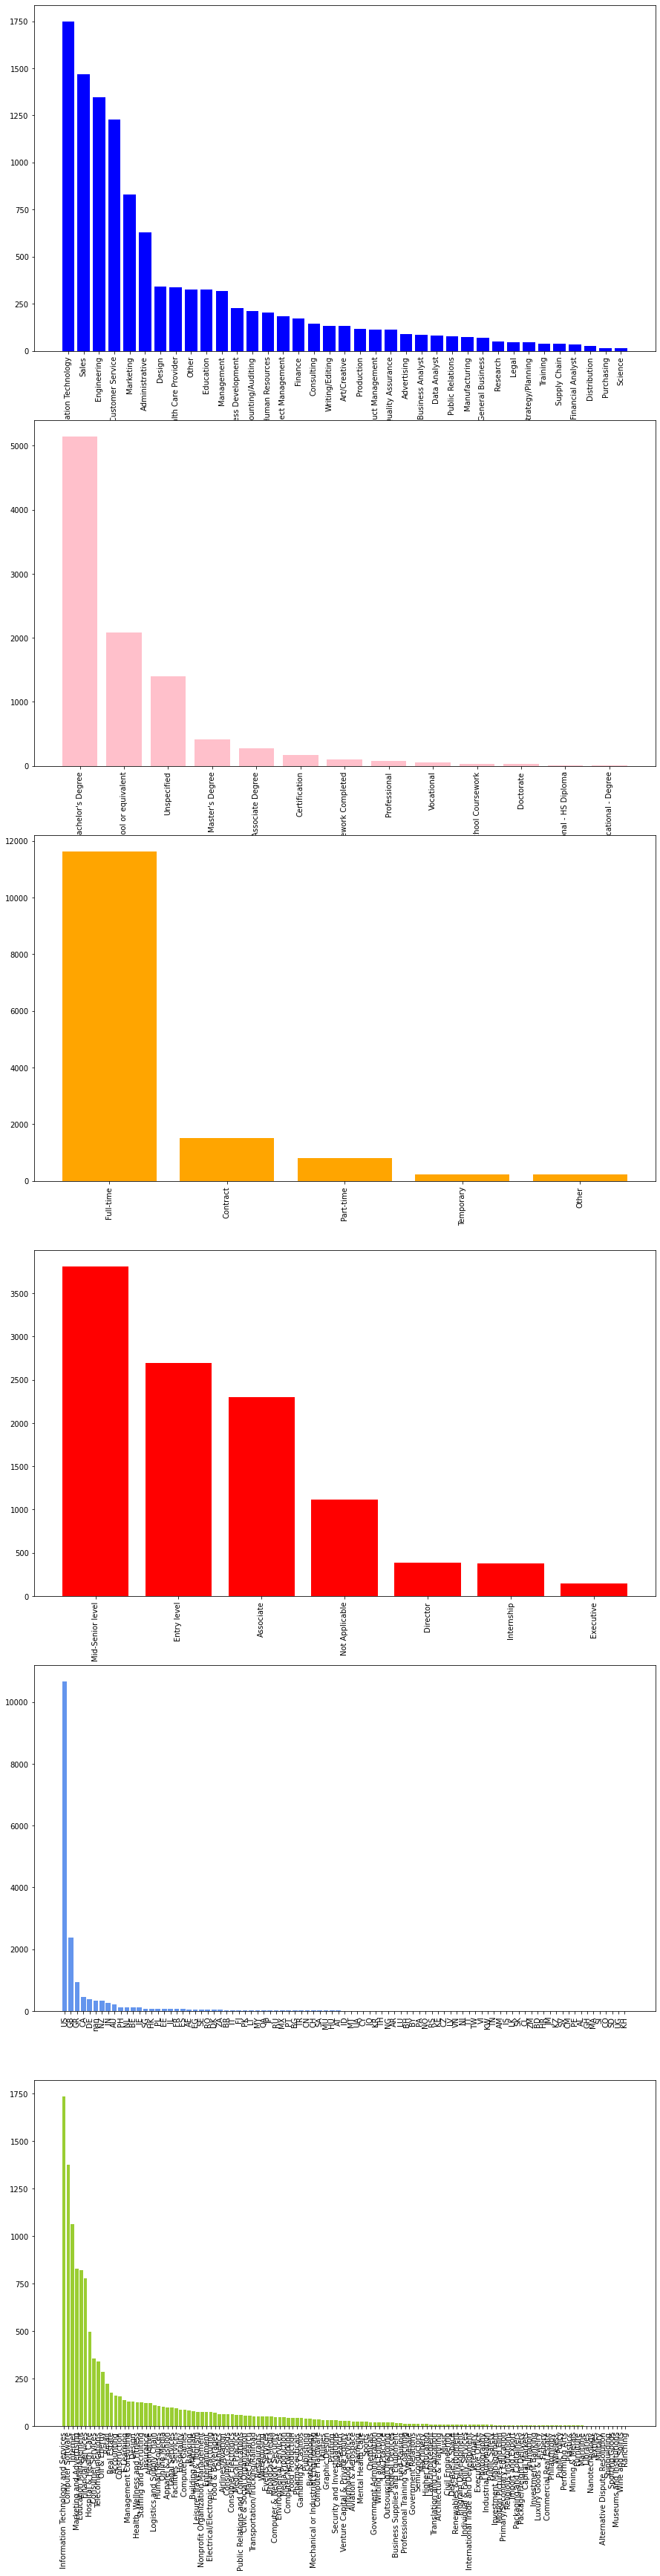

In [11]:
# Plot frequencies of unique values of categorical variables
fig, ax1 = plt.subplots(nrows = 6,
                    ncols = 1,
                    figsize=(15,60))
ax1[0].bar(fake_jobs['function'].value_counts().index, fake_jobs['function'].value_counts(), color='blue')
ax1[0].set_xticklabels(fake_jobs['function'].value_counts().index, rotation = 90)
ax1[1].bar(fake_jobs['required_education'].value_counts().index, fake_jobs['required_education'].value_counts(), color='pink')
ax1[1].set_xticklabels(fake_jobs['required_education'].value_counts().index, rotation = 90)
ax1[2].bar(fake_jobs['employment_type'].value_counts().index, fake_jobs['employment_type'].value_counts(), color='orange')
ax1[2].set_xticklabels(fake_jobs['employment_type'].value_counts().index, rotation = 90)
ax1[3].bar(fake_jobs['required_experience'].value_counts().index, fake_jobs['required_experience'].value_counts(), color='red')
ax1[3].set_xticklabels(fake_jobs['required_experience'].value_counts().index, rotation = 90)
ax1[4].bar(fake_jobs['country'].value_counts().index, fake_jobs['country'].value_counts(), color='cornflowerblue')
ax1[4].set_xticklabels(fake_jobs['country'].value_counts().index, rotation = 90)
ax1[5].bar(fake_jobs['industry'].value_counts().index, fake_jobs['industry'].value_counts(), color='yellowgreen')
ax1[5].set_xticklabels(fake_jobs['industry'].value_counts().index, rotation = 90)